# MNIST classification using Linear Regression

#### 1. import packages

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from LogisticRegression import *

#### 2. Prepare dataset

Constants

In [2]:
batchSize = 100
datasetDir = "./datasets"

Get data

In [3]:
trainData = datasets.MNIST(root=datasetDir, train=True, transform=transforms.ToTensor(), download=True)
testData = datasets.MNIST(root=datasetDir, train=False, transform=transforms.ToTensor(), download=True)
trainSet, valSet = random_split(trainData, [50000, 10000]) # Create validation set

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets\MNIST\raw



Data loaders

In [4]:
trainLoader = DataLoader(trainSet, batch_size=batchSize, shuffle=True)
valLoader = DataLoader(valSet, batch_size=batchSize, shuffle=False)
testLoader = DataLoader(testData, batch_size=batchSize, shuffle=False)

#### 3. Train model

Initialize model

In [5]:
model = MNIST_Logistic_Regression()

Constants

In [6]:
numEpochs = 5
learningRate = 0.001

Initial accuracy

In [7]:
epochAccuracy = [evaluate(model, valLoader)]

Train model

In [8]:
epochAccuracy += fit(numEpochs, learningRate, model, trainLoader, valLoader)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [0], val_loss: 1.8348, val_acc: 0.6745


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1], val_loss: 1.5371, val_acc: 0.7547


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2], val_loss: 1.3306, val_acc: 0.7837


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3], val_loss: 1.1835, val_acc: 0.8003


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4], val_loss: 1.0751, val_acc: 0.8107


Plot accuracy vs num epochs

[0.12140001356601715, 0.674500048160553, 0.7547000050544739, 0.7836999297142029, 0.8003000020980835, 0.810699999332428]


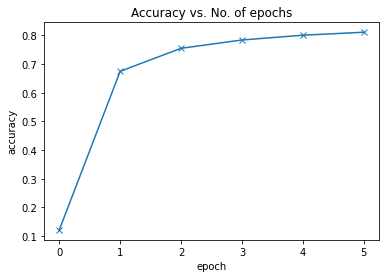

In [9]:
accuracies = [result['val_acc'] for result in epochAccuracy]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
print(f"{accuracies}")

#### 4. Test model

Test accuracy=0.8198999762535095


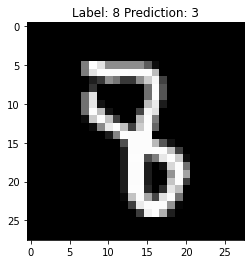

enter n to see next image, or anything else to exit:  


In [10]:
# Overall test accuracy
result = evaluate(model, testLoader)
print(f"Test accuracy={result['val_acc']}")

def predict_image(img, model):
    x = img.unsqueeze(0)
    y = model(x)
    _, preds = torch.max(y, dim=1)
    return preds[0].item()

keyboard = 'n'
while keyboard == 'n':
    img, label = testData[int(torch.randint(0, len(testData), (1,1)))]
    displayImage(img, label, predict_image(img, model))
    keyboard = input("enter n to see next image, or anything else to exit: ")